In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [19]:
# 데이터 준비
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

X = breast_cancer['data']
y = breast_cancer['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [20]:
from matplotlib.pylab import rand
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

X, y = make_blobs(n_samples=50, centers=5, random_state=42, cluster_std=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled1 = mms.transform(X_test)      # 훈련 데이터의 스케일 변환 규칙 적용
X_test_scaled2 = mms.fit_transform(X_test)  # 테스트 데이터의 스케일 변환 규칙 별도로 적용


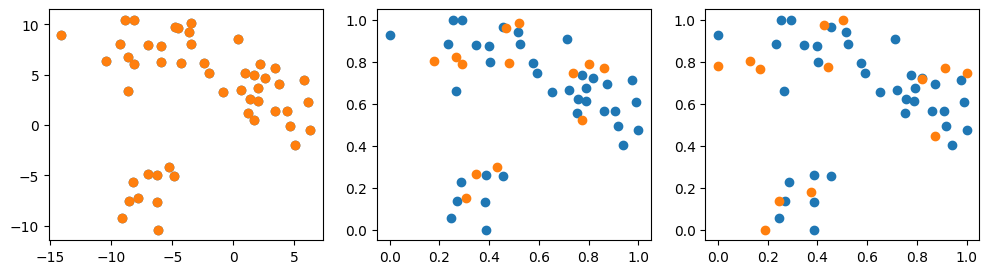

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes = axes.flatten()

axes[0].scatter(X[:, 0], X[:, 1])
axes[0].scatter(X[:, 0], X[:, 1])

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
axes[1].scatter(X_test_scaled1[:, 0], X_test_scaled1[:, 1])

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1])
axes[2].scatter(X_test_scaled2[:, 0], X_test_scaled2[:, 1])

plt.show()